# TensorFlow

## Prediccion de precios de casas según su tamaño:

### Librerias:

In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Creacion de Modelo:

In [2]:
houses_numbers = 160; #Se establece el numero de casas con el que se quiere trabajar.

In [3]:
np.random.seed(42); #Numero en el que empezara a hacer el conteo aleatorio.

In [4]:
#160 tamaños de casasnumeros aleatorios entre 1000 y 3600.
house_size = np.random.randint(low = 1000, high= 3600, size=houses_numbers)

In [5]:
np.random.seed(42);

In [6]:
#160 precios de casas aleatorios entre 20000 y 70000 sumados por la multiplicacion del tamaño y 100.0
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=houses_numbers)

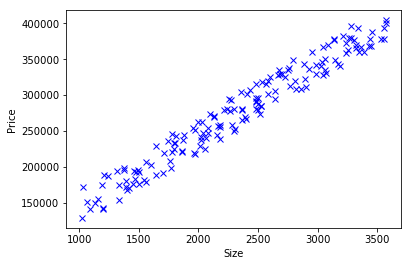

In [7]:
plt.plot(house_size, house_price, "bx") # Tamaño en eje X, Precio en eje Y.
plt.ylabel("Price") # Label para el eje Y.
plt.xlabel("Size") # Label para el eje X.
plt.show() # Se muestra la grafica.

### Preparación de datos:

In [8]:
# Normalizacion de datos para que el tamaño y precio esten en la misma escala.
def normalize(array):
    return (array - array.mean())/ array.std()

In [9]:
# Divisiom de datos para entrenamiento. MathFloor devuelve un entero menor o igual a un numero.
train_samples_number = math.floor(houses_numbers * 0.7) # 70% de datos para entrenamiento. -112 numeros-

In [10]:
# Tomamos el 70% de datos y los etiquetamos como datos de entrenamiento.
train_house_size = normalize(house_size[:train_samples_number]);
train_house_price = normalize(house_price[:train_samples_number]);

# Se normalizan los datos.

train_house_size_norm = normalize(train_house_size);
train_house_price_norm = normalize(train_house_price);

In [11]:
# Se toman los ultimo 30% datos para testear.
test_house_size = normalize(house_size[train_samples_number:]);
test_house_price = normalize(house_price[train_samples_number:]);

# Se normalizan los datos.
test_house_size_norm = normalize(test_house_size);
test_house_price_norm = normalize(test_house_price);

### Contenedores Tensor

###### Existen diversos tipos de contenedores de tensores: Constant , Variable, PlaceHolder

In [12]:
# Se usa "TensorFlow PlaceHolder" que se actualiza cada vez que se deciende el gradiente.
tf_house_size = tf.placeholder("float", name="house_size");
tf_price = tf.placeholder("float", name="price");

#### 1. Variables que presionan el factor de tamaño y precio

In [13]:
# Se definen las variables presionando el factor del precio y el precio durante el entrenamiento.
# Se inicializan en valores random basados en la distribucion normal.
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor");
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

### Funcion de Inferencia

In [14]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset) # Funcion De Inferencia

### Calculo de error

In [15]:
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2))/(2*train_samples_number) # Calculo de error

In [16]:
# Rango de aprendizaje optimo
learning_rate = 0.1

### Funcion de Optimizacion

In [17]:
# Definicion del gradiente de decenso que minimiza las perdidas en el costo de operaciones
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost) 

### TensorFlow Variables INIT

In [18]:
# Las variables estan definidas en el entorno de TensorFlow pero no en el entorno Global y no tienen valores iniciales.
init = tf.global_variables_initializer();

## Sesion:

iteation #: 0002 cost=  0.720269 size_factor= 0.0916244 price_offset= -0.782001
iteation #: 0004 cost=  0.489369 size_factor= 0.252775 price_offset= -0.640098
iteation #: 0006 cost=  0.334681 size_factor= 0.384679 price_offset= -0.523937
iteation #: 0008 cost=  0.231054 size_factor= 0.492645 price_offset= -0.428846
iteation #: 0010 cost=  0.161635 size_factor= 0.581017 price_offset= -0.351004
iteation #: 0012 cost=  0.115134 size_factor= 0.65335 price_offset= -0.287282
iteation #: 0014 cost=  0.083987 size_factor= 0.712556 price_offset= -0.235119
iteation #: 0016 cost=  0.063126 size_factor= 0.761017 price_offset= -0.192418
iteation #: 0018 cost=  0.049155 size_factor= 0.800683 price_offset= -0.157462
iteation #: 0020 cost=  0.039799 size_factor= 0.83315 price_offset= -0.128848
iteation #: 0022 cost=  0.033535 size_factor= 0.859725 price_offset= -0.105423
iteation #: 0024 cost=  0.029342 size_factor= 0.881477 price_offset= -0.086248
iteation #: 0026 cost=  0.026535 size_factor= 0.89928

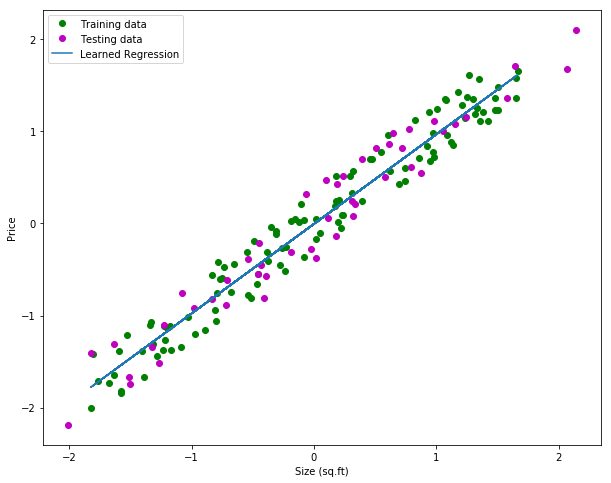

In [28]:
with tf.Session() as sess:
    sess.run(init)
    
    # Mostrar el proceso de entrenamiento y el numero de iteraciones
    display_every = 2;
    num_training_iter = 50;
    
    #Unir los datos de entrenamiento
    for iteration in range(num_training_iter):
        for(x, y) in zip(train_house_size_norm, train_house_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})
    
        if(iteration + 1)% display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_house_price_norm});
            print("iteation #:", "%04d" % (iteration + 1), "cost=", "{:9f}".format(c), \
                 "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
        
    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_house_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')

    # Volver valores a la escala original

    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_house_price.mean()
    train_price_std = train_house_price.std()
    
    # Graficas
    
    plt.rcParams["figure.figsize"]=(10, 8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_house_price, 'go', label="Training data")
    plt.plot(test_house_size, test_house_price, 'mo', label="Testing data")
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
            (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std +
            train_price_mean, label='Learned Regression')

    plt.legend(loc='upper left')
    plt.show()
        